# Numpy & Matplotlib

* **Numpy**: principal pacote de cálculo numérico usado em Python;
* **Matplotlib**: visualização e produção de gráficos

## Básico de Numpy 

Encontramos alguns problemas referente à **velocidade** de processamento quando queremos resolver problemas relativamente simples:

* Somar listas termo a termo:
    ```python
    A = [1, 2, 3]
    B = [4, 5, 6]
    A + B ?
    ```
* Existem **sim** opções sem a necessidade de `import`:

**Exercício:** Implemente uma função (não *importe* nada) que tome duas listas de mesmo tamanho e retorne a lista resultante de uma soma termo à termo. Nós já vimos dois jeitos de se fazer isso, tente replicar um deles de memória. 

Existe um modo mais fácil de fazer isso, e muitas outras coisas, que é usando o pacote `numpy`:

In [2]:
# Por convenção usa-se o codinome "np"
import numpy as np

a = np.array([1,2,3,4])
b = np.array([10,11,12,13])

### Elemento a elemento:

O cálculo com arrays executa por padrão operações elemento à elemento:

In [2]:
a + b

array([11, 13, 15, 17])

In [3]:
a * b

array([10, 22, 36, 52])

In [4]:
a / b

array([0.1       , 0.18181818, 0.25      , 0.30769231])

In [5]:
np.exp(a)

array([ 2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [6]:
np.cosh(b)

array([ 11013.2329201 ,  29937.07086595,  81377.39571257, 221206.69600559])

### Mas não é só isso, claro

Imagine escrever um código em duas linhas que toma a média de uma amostra de 1000 números aleatórios com distribuição uniforme:

In [7]:
x = np.random.uniform(0,1,1000)
x.mean()

0.5121143021774055

O que está pro detrás dessa rapidez são rotinas escritas em `C` e em `Fortran` para as quais o numpy faz a interface.

### Explorando um pouquinho:

A coisa mais importante introduzida pelo `numpy` é, com certeza, o objeto do tipo `array`.

Tais objetos são muito parecidos com listas de Python, com duas diferenças cruciais:
* Todos os valores de uma array devem ter o **mesmo tipo**
* Nem todos os tipos são possíveis: somente números e `True`'s e `False`'s

In [8]:
type(a)

numpy.ndarray

In [9]:
# Diferentemente das listas, os elementos das arrays são do mesmo tipo
a.dtype

dtype('int64')

### Criando `arrays`:

A forma mais direta de se construir uma array é transformando uma lista de python em array:

**Exercício 1 :** Existem funções para criar arrays com valores predeterminados; digite, por exemplo, o script (código) abaixo no Jupyter ou no Ipython e tirem conclusões das funções (métodos) utilizadas. Quais argumentos elas devem receber? O que elas geram como saída? Explique o porquê dos argumentos adotados.

```python

import numpy as np

N = 10
x = np.ones(N)
y = np.zeros(2*N)

z_0 = - np.pi
z_N = np.pi
z = np.linspace(z_0, z_N, N+1)

w_i = 0
w_f = 1
dw = 0.1
w = np.arange(w_i, w_f + dw, dw)
```

### Formatos e tamanhos

Todas as arrays vistas até aqui **não** são nem vetores coluna **nem** vetores linha. Podemos mudar isso alterando o atributo `shape`:

In [ ]:
z = np.zeros(10)
print(z)
print(z.shape)

In [ ]:
# Digamos que queiramos um vetor coluna 10 x 1:
z.shape = (10,1)
print(z)

### Formatos e tamanhos

Podemos, também, criar as array já no formato desejado

In [ ]:
z = np.ones((10,1))
z

Ou alterar mais drasticamente o formato da array:

In [ ]:
z.shape = (2,5)
z

### Para explorar ainda mais:

```python
dir(z)     # Lista todos os atributos e métodos
help(z)    # Mostra a documentação de todo o objeto.   
```

In [ ]:
# Para saber mais:

np.info(z.fill)

### Broadcasting

Damos o nome de **Broadcasting** (transmissão) ao modo como o numpy trata arrays de diferentes formas em operações aritméticas.

In [ ]:
# Operações entre arrays são, geralmente
# elemento à elemento:
a = np.array([1, 2, 3])
b = np.array([2, 2, 2])
c = np.array([3, 3, 3])

print(a * b)
print(a + c)

In [ ]:
# Porém, olhe que ocorre depois dos seguintes comandos:
b = 2
c = 3

print(a * b)
print(a + c)

### Broadcasting

Vamos tentar outros exemplos:

In [ ]:
A = np.array([[1,2,3],[11,12,13]])
B = np.array([10, 20, 30])
C = A + B # ? 

print(A)
# print(A + B) # Qual será o resultado?

In [ ]:
print(A * B) # E quanto à multiplicação

## Álgebra com matrizes:

É do nosso interesse, por ventura, fazer cálculos com matrizes e vetores linha e coluna:

In [ ]:
print(a,"\n")
print(b,"\n")

Transformamos  `a` num vetor coluna:

In [ ]:
a.shape = (4,1)
a

Na lógica de matrizes qual seria o resultado de:

In [ ]:
a * b

In [ ]:
# Seguindo essa lógica, qual seria o resultado de:
b * a

In [ ]:
# Da mesma maneira, o resultado a seguir não
# condiz com a álgebra de matrizes:
a + b

E a multiplicação entre matrizes e vetores?

Operação tão importante que descreve transformações lineares.

In [ ]:
Id_4 = np.eye(4)*4
print(Id_4)
print("\n")
print(Id_4 * a)

A função `np.dot` (ou o `@`) executa o trabalho:

In [ ]:
print(np.dot(Id_4, a))
print("\n")

print(np.dot(Id_4, a.reshape((4,)))) # retorna "a" ao formato original
print("\n")

print(Id_4 @ a)
print("\n")

print(Id_4 @ a.reshape((4,))) # retorna "a" ao formato original 

Também funciona para calcular produtos internos (escalares):

In [ ]:
print(np.dot(b, a))

In [ ]:
# Se estivermos trabalhando com arrays simples, tudo bem:
a.shape = (4,)
b.shape = (4,)

a @ b

### Indexação

Muito semelhante (pra não dizer idêntico) ao caso das listas.

In [ ]:
print(a)

In [ ]:
# Lousa 
a[0] = 10
a

### Atenção: Tipagem forte (cuidado)

In [ ]:
a[1] = 3.1415
a

In [ ]:
a = np.array([1,2.0,3+4j])
a.dtype

In [ ]:
a = np.array([1,2,3], dtype=complex)
a

## Fatiando arrays (slicing):

In [ ]:
a = np.arange(10) # versão numpy do "range"
print(a)
print(a[1:3]) # exclui o último índice
print(a[:-2]) # exclui os dois últimos números
print(a[::2]) # só pares
print(a[1::2]) # só ímpares

In [ ]:
c = np.array([[1,2,3],[4,5,6]])
c

In [ ]:
c[0,0]

In [ ]:
c[0]

In [ ]:
c[:,0]

### Exercício 2 (slicing):

* Crie uma matriz 5 x 5 contendo os inteiros 0, 1,..., 24
* Mostre somente a terceira coluna
* Mostre a última linha (faça de um jeito que não dependa do tamanho da array) 
* Faça um 'slice' contendo a segunda e a quarta coluna

In [ ]:
a = np.arange(25).reshape(5,5)

In [ ]:
a[:,1::2]

In [ ]:
a[:,3]

In [ ]:
a[-1,:]

In [ ]:
# Interprete o resultado da seguinte "slice":
a[1::2,:-2:2]

## Fancy indexing

É possível construir arrays com base em outras arrays usando a técnica do *Fancy indexing*.

Note que com o *Fancy indexing* nós realmente criamos uma nova array, não um "ponteiro" como no
caso do slicing.

In [ ]:
a = np.arange(0,80,10) # faça um print se não lembra o que isso faz
indices = [1, 2, -3]   # define uma lista de índices que me interessa

y = a[indices] # nova array "y" recebe apenas os valores de "a" com índices de interesse
print(a)
print(y)

In [ ]:
# Podemos fazer atribuições com Fancy indexing
a[indices] = 72
print(a)

In [ ]:
y #  Lembrando Fancy indexing faz cópias; slicing não

In [ ]:
# Criação manual de máscaras
mask = np.array([0,1,1,0,0,1,0,0], dtype=bool)
y = a[mask]
print(y)

**Exercício 3**: Comente cada uma das linhas explicitando o que cada uma delas faz. 

In [7]:
A = np.arange(25).reshape(5, 5)
B = A[[0,1,2,3],[1,2,3,4]]

print(A)
print("\n", B)

div3 = A[A % 3 == 0]

print(div3)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

 [ 1  7 13 19]
[ 0  3  6  9 12 15 18 21 24]


In [ ]:
np.where(A % 3 == 0, A, np.nan)

## A "State machine" do Matplotlib

Todo comando dado é aplicado modificando o atual estado da área de plot:

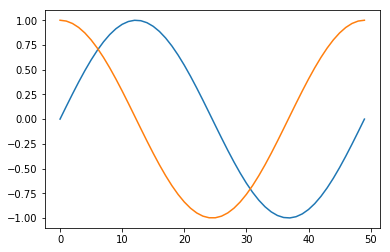

In [3]:
import matplotlib.pyplot as plt

t = np.linspace(0, 2*np.pi, 50)  
x = np.sin(t) # aplica a função seno sobre todos os valores de 't'
y = np.cos(t) # alpica cosseno em 't'

# fazemos um plot dentro da figura
"""
Note que não foi dada uma variável para as abscissas.
Procure entender o que significa os números no eixo x 
"""
plt.plot(x)
plt.plot(y) # podemos ir adicionando plots

# Para visualizar
plt.show()

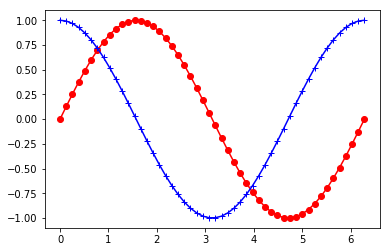

In [10]:
# Inserindo mais gráficos e 'marcando eles'
# Agora temos valores para "x" e para "y"
plt.plot(t, x,'r-o') # 
plt.plot(t, y,'b+-') # O tercei
plt.show()

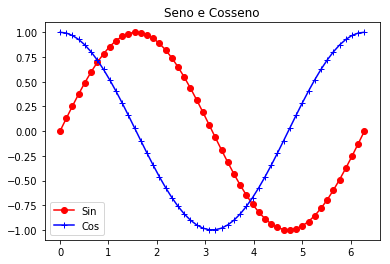

In [11]:
# Inserindo mais gráficos e 'marcando eles'
plt.plot(t, x, 'r-o', label='Sin')
plt.plot(t, y, 'b+-', label='Cos')
plt.title('Seno e Cosseno')
plt.legend()
plt.show()

### Subplots:

Podemos (e até aconselhamos) usar a sintaxe de *subplots* mesmo quando precisar de um único gráfico: 

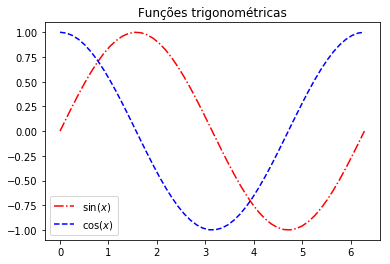

In [20]:
fig = plt.figure()          # 1° defina sua figura
ax  = fig.add_subplot(111)  # 2° adiciona um eixo onde irão os dados do gráfico
ax.plot(t,x,'r-.',label=r"$\sin(x)$")
ax.plot(t,y,'b--',label=r"$\cos(x)$")
ax.legend()
plt.title("Funções trigonométricas")
plt.show()

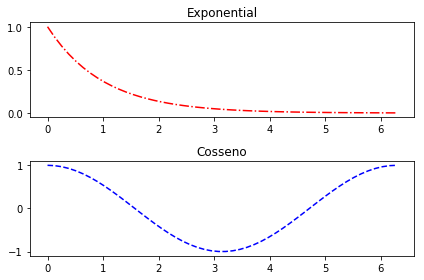

In [21]:
fig  = plt.figure()          # 1° defina sua figura
ax1  = fig.add_subplot(211)  # 2° adiciona um eixo onde irão os dados do gráfico
ax2 = fig.add_subplot(212)

ax1.plot(t,np.exp(-t),'r-.',label=r"$e^{-t}\cos(t)$")
ax2.plot(t,y,'b--',label=r"$\sin(t)$")

ax1.set_title("Exponential")
ax2.set_title("Cosseno")

plt.tight_layout() # Ajusta as posições dos subplots para as informações não se sobreponham 
plt.show()

## Scatter plots

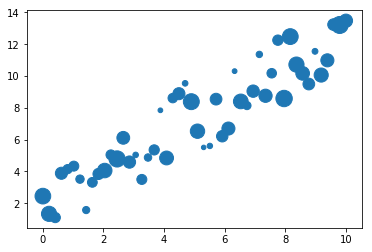

In [23]:
from numpy.random import rand

N = 50
x = np.linspace(0, 10, N)

e = rand(N) * 5 # 'Ruído' aleatório
y1 = x + e

areas = rand(N) * 300 
plt.scatter(x, y1, s=areas)
plt.show()

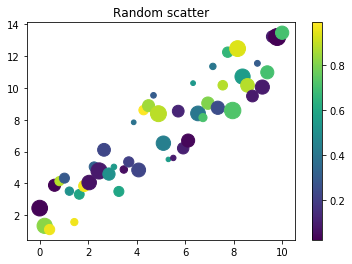

In [24]:
colors = rand(N)
plt.scatter(x, y1, s=areas, c=colors)
plt.colorbar()
plt.title("Random scatter")
plt.show()

## Plot de funções com 2 variáveis:

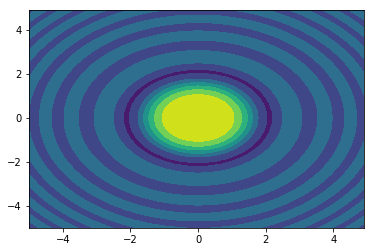

In [25]:
x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2 + yy**2)/(xx**2+yy**2)

h = plt.contourf(x,y,z)
plt.show()